# manifold graph

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../utils/')
import imp
import plot_tools
imp.reload(plot_tools)
import pandas as pd
import networkx as nx

# KDE

In [2]:
from sklearn.datasets import make_circles
import plot_tools
import plotly.graph_objects as go
import numpy as np

import kde
import imp
imp.reload(kde)

<module 'kde' from '../utils/kde.py'>

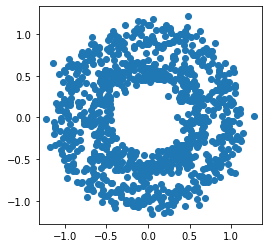

In [3]:
panda=pd.read_csv('../ex1_toy/artificial_csv/circles_0.1_noise.csv', header=None)
X=panda.values[:,:2]
plot_tools.autoPlot(X)

In [4]:
# def plot_density(X,P):
#     plot_tools.autoPlot(testX,P,continues=True)

#     fig = go.Figure()
#     fig.add_trace(
#                     go.Scatter3d(
#                         x=testX[:,0],
#                         y=testX[:,1],
#                         z=P,
#                         mode='markers',
#                         marker=dict(
#                             size=5,
#                             color=P,                # set color to an array/list of desired values
#                             colorscale='Viridis',   # choose a colorscale
#                             opacity=0.8
#                         )
#                         ),
#     )

#     fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
#     fig.show()

def plot_density(x,y,P):
    fig = go.Figure()
    fig.add_trace(
                    go.Surface(
                        x=x,
                        y=y,
                        z=P,
                        colorscale='Viridis'
                        )
                    )
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
    fig.show()

normalize=lambda x:(x-np.min(x))/(np.max(x)-np.min(x))

In [5]:
scope = np.linspace(-1.2, 1.2, 80)
testX=np.meshgrid(scope,scope)
testX=np.hstack( [testX[0].reshape(-1,1),testX[1].reshape(-1,1)] )

PD=kde.KDE_DIS(X,31)
P,D,I=PD.get_density(testX,train=True)
plot_density(scope,scope,P.reshape(80,80))

In [10]:
from sklearn.neighbors import KernelDensity
kde_classical = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(X)
P2=kde_classical.score_samples(testX)

plot_density(scope,scope,normalize(P2).reshape(80,80))

# Boundary points

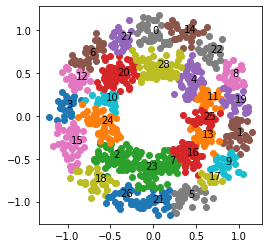

In [2]:
panda=pd.read_csv('../ex1_toy/artificial_csv/circles_0.1_noise.csv', header=None)
X=panda.values[:,:2]
Y=panda.values[:,2]

import detect_local_mode
imp.reload(detect_local_mode)

K_d=30
K_n=10
lamda=0.45
epsilon=0.1

extend=np.zeros((X.shape[0],2))
extend[:,1]=range(0,X.shape[0])
X_extend=np.hstack([X,extend])

Dis,manifolds,connection,noise,P2M,draw_tasks=detect_local_mode.Manifold.get_manifolds(X_extend,K_d=K_d,K_n=K_n,epsilon=epsilon)
noise_manifold=manifolds[0]
real_manifolds=manifolds[1:]
plot_tools.PaperGraph.show_manifolds(real_manifolds,X_extend,seed=2018)

import topo_graph
imp.reload(topo_graph)
BoundaryMat_E=topo_graph.TopoGraph.get_boundary(connection,real_manifolds)

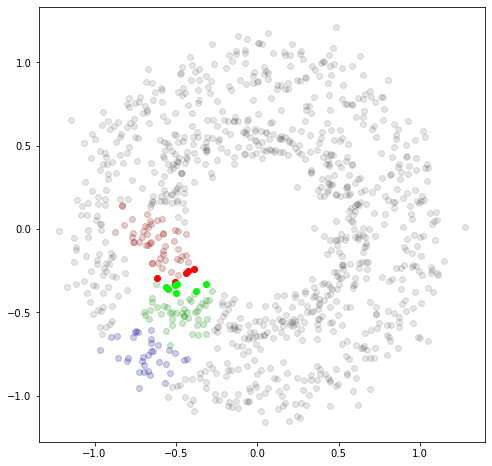

In [3]:
i,j=24,2
k=18

# background
plt.figure(figsize=(8,8))
plt.scatter(X_extend[:,0],X_extend[:,1],color=(0, 0, 0, 0.1))

# class i and j
Point_i=real_manifolds[i].pID
Point_j=real_manifolds[j].pID
plt.scatter(X_extend[Point_i,0],X_extend[Point_i,1],color=(1, 0, 0, 0.1))
plt.scatter(X_extend[Point_j,0],X_extend[Point_j,1],color=(0, 1, 0, 0.1))

Point_k=real_manifolds[k].pID
plt.scatter(X_extend[Point_k,0],X_extend[Point_k,1],color=(0, 0, 1, 0.1))

# boundary i and j
B_i=list(set(BoundaryMat_E[i,j][:,0])&set(Point_i))
B_j=list(set(BoundaryMat_E[i,j][:,1])&set(Point_j))
plt.scatter(X_extend[B_i,0],X_extend[B_i,1],color=(1, 0, 0, 1))
plt.scatter(X_extend[B_j,0],X_extend[B_j,1],color=(0, 1, 0, 1))

In [4]:
def draw_boundary_graph(E,Point_i,X_extend):
    G=nx.from_edgelist(E)

    nodes=list(G.nodes)
    node_color=[]
    pos={}
    for i in range(len(nodes)):
        pos[nodes[i]]=(X_extend[nodes[i],0],X_extend[nodes[i],1])
        if nodes[i] in Point_i:
            node_color.append('red')
        else:
            node_color.append('green')

    centers=[]
    for i in range(E.shape[0]):
        centers.append(np.mean(X_extend[E[i],:2],axis=0))
    centers=np.array(centers)

    nx.draw(G,pos=pos,node_color=node_color,with_labels=True)
    plt.scatter(centers[:,0],centers[:,1],c='orange')
    
    plt.show()
    return centers

In [5]:
centerX=draw_boundary_graph(BoundaryMat_E[i,j],Point_i, X_extend)

In [30]:
def plot_density(x,y,P,testX,testY,testP):
    fig = go.Figure()
    fig.add_trace(
                    go.Surface(
                        x=x,
                        y=y,
                        z=P,
                        colorscale='Viridis',
                        opacity=1
                        )
                    )
    
    fig.add_trace(
                    go.Scatter3d(
                        x=testX,
                        y=testY,
                        z=testP,
                        mode='markers',
                        marker=dict(
                            size=5,
#                             color=testP,               
                            colorscale='oranges',  
                            opacity=1
                        )
                        )
                    )
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                      scene=dict(
                          xaxis=dict(
                                autorange=True,
                                showgrid=False,
                                ticks='',
                                showticklabels=False,
                                showaxeslabels=False,
                                title=dict(text='')
                            ),
                          yaxis=dict(
                                autorange=True,
                                showgrid=False,
                                ticks='',
                                showticklabels=False,
                                showaxeslabels=False,
                                title=dict(text='')
                            ),
                          zaxis=dict(
                                autorange=True,
                                showgrid=False,
                                ticks='',
                                showticklabels=False,
                                showaxeslabels=False,
                                title=dict(text='')
                            ),
                      )
                     )
    fig.show()

In [31]:
scope = np.linspace(-1.2, 1.2, 80)
grid=np.meshgrid(scope,scope)
grid=np.hstack( [grid[0].reshape(-1,1),grid[1].reshape(-1,1)] )

PD=kde.KDE_DIS(X,30)
P,D,I=PD.get_density(grid,30,train=True)

P2,D,I=PD.get_density(centerX,30)

plot_density(scope,scope,P.reshape(80,80),centerX[:,0],centerX[:,1],P2)

# ascending manifold

In [1]:
import os.path
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()

In [11]:
np.random.seed(0)
data = np.hstack(
   [np.random.normal(loc=-4.5, scale=1.0, size=90),
   np.random.normal(loc=-0.5, scale=0.15, size=100),
   np.random.normal(loc=4.5, scale=0.1, size=75)]
)

In [12]:
kde = sm.nonparametric.KDEUnivariate(data)
kde.fit()
pdf = kde.density
support = kde.support

merge_levels = [0.041, 0.0765]
merge_xs = [-2.65, 1.5]
mode_levels = [0.091, 0.148, 0.107]
mode_xs = [-4.05, -0.57, 3.475]

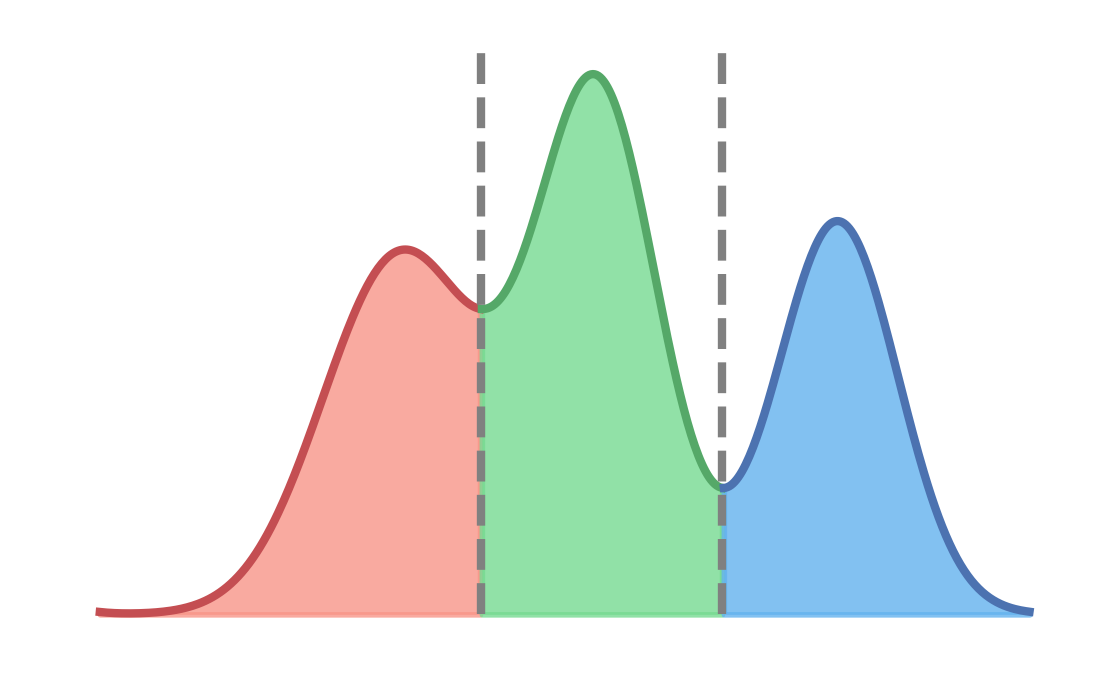

In [69]:
mask1 = support<-2.9
mask2 = np.logical_and( -2.9<support , support<2.1 )
mask3 = 2.1<support

fig = plt.figure(dpi=200)
ax = fig.add_subplot(111)
ax.plot(support[mask1], pdf[mask1],c='r')
ax.plot(support[mask2], pdf[mask2],c='g')
ax.plot(support[mask3], pdf[mask3],c='b')

# Vertical branches
ax.plot([-2.9] * 2, [-0, 0.13], c='gray',linestyle="--" )
ax.plot([2.1] * 2, [-0, 0.13], c='gray',linestyle="--" )

plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
plt.yticks([])
plt.xticks([])
plt.tight_layout()
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(0)
ax.spines['left'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)

plt.fill_between(support[mask1], 0, pdf[mask1], alpha=0.8, color=(248/255,149/255,136/255))
plt.fill_between(support[mask2], 0, pdf[mask2], alpha=0.8, color=(118/255,218/255,145/255))
plt.fill_between(support[mask3], 0, pdf[mask3], alpha=0.8, color=(99/255,178/255,238/255))
plt.tight_layout()
plt.savefig('fig/motivation.png',bbox_inches = 'tight',pad_inches = 0)

# 3d search peak

In [72]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def func(x,y):
    return 0.4*np.exp(-(x+2)**2/4-(y+1)**2/4)+0.5*np.exp(-(x-2)**2/4-y**2/4)+0.3*np.exp(-(x-6)**2/4-(y-1)**2/4)

# (-2,-1)->(2,1)->(4,3)

X,Y=np.meshgrid(np.linspace(-5, 9, 200),np.linspace(-5, 4, 200))
Z = func(X,Y)

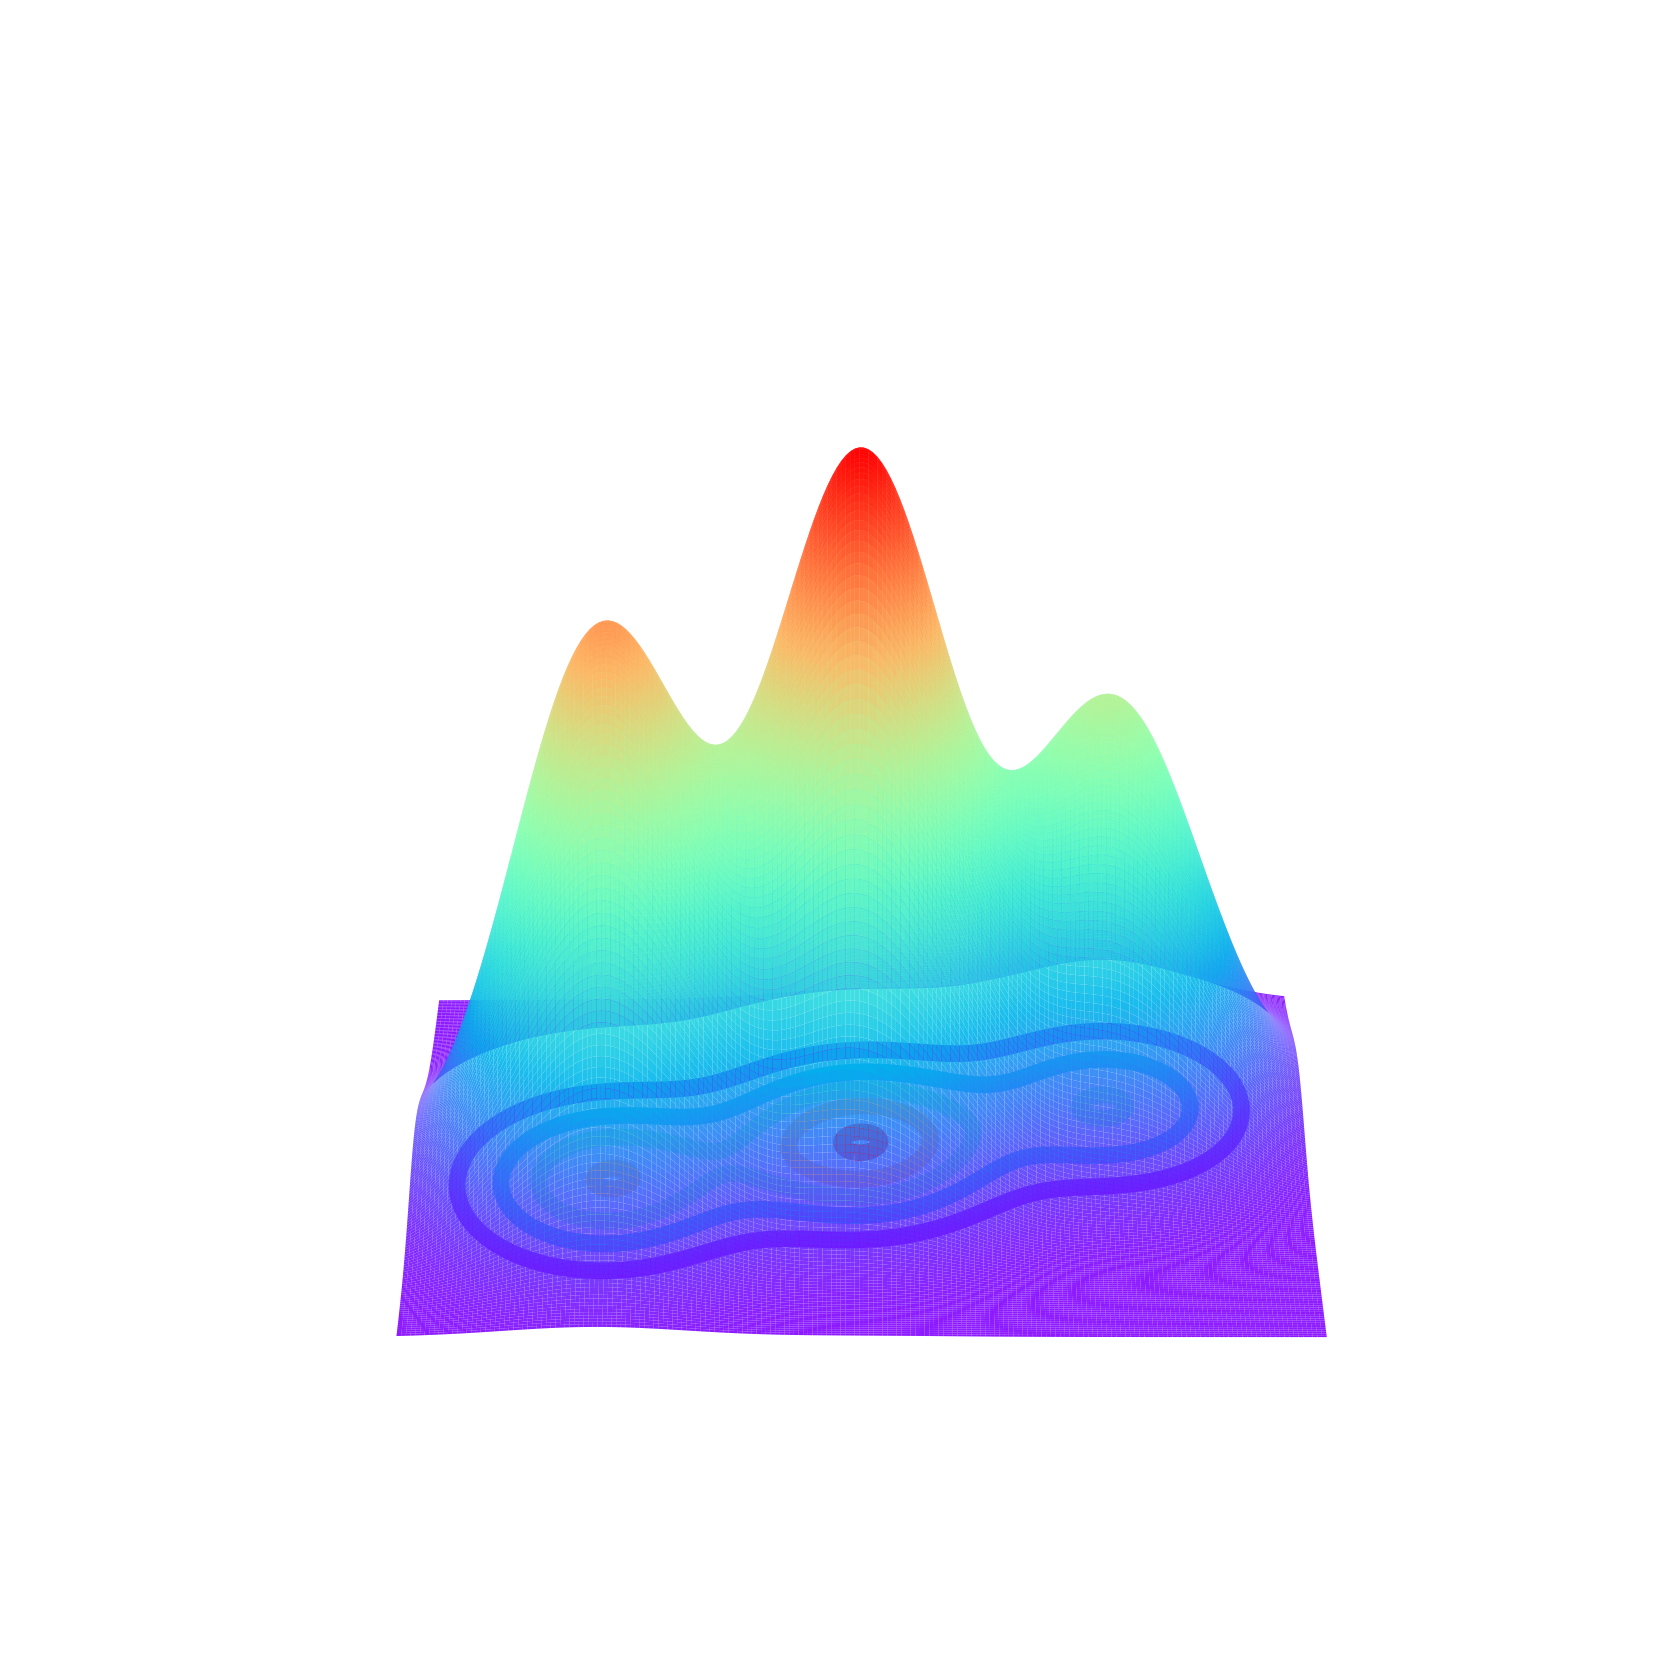

In [90]:
fig = plt.figure(dpi=400)
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = plt.get_cmap('rainbow'),alpha=0.9)
# ax.plot_surface(X, Y, np.zeros_like(X)+0.3,cmap= 'Pastel1',alpha=0.5)
ax.contour(X, Y, Z, zdir = 'z', offset = 0, cmap = plt.get_cmap('rainbow'),levels=[0.1,0.2,0.3,0.4,0.5])
ax.view_init(elev=20, azim=-90)
plt.axis('off')
plt.savefig('fig/3d_peak.png',bbox_inches = 'tight',pad_inches = 0)

In [216]:
fig = plt.figure(dpi=200)
fig,ax = plt.subplots(1)
plt.gcf().set_dpi(200)
ax.contour(X, Y, Z, zdir = 'z', offset = 0, cmap = plt.get_cmap('rainbow'),levels=[0.1,0.2,0.3,0.4,0.5])
# ax.spines['top'].set_linewidth(1)
# ax.spines['bottom'].set_linewidth(1)
# ax.spines['left'].set_linewidth(1)
# ax.spines['right'].set_linewidth(1)
# plt.xticks([])
# plt.yticks([])
plt.axis('off')
plt.savefig('fig/2d_contour.png',bbox_inches = 'tight',pad_inches = 0)

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning:

The following kwargs were not used by contour: 'zdir', 'offset'



<Figure size 1200x800 with 0 Axes>